Training Logistic Regression...
Logistic Regression trained on 20.0% of the data: Validation Accuracy = 0.5665
Logistic Regression trained on 40.0% of the data: Validation Accuracy = 0.5542
Logistic Regression trained on 60.0% of the data: Validation Accuracy = 0.5153
Logistic Regression trained on 80.0% of the data: Validation Accuracy = 0.5112
Logistic Regression trained on 100.0% of the data: Validation Accuracy = 0.5419
Training kNN...
kNN trained on 20.0% of the data: Validation Accuracy = 0.5174
kNN trained on 40.0% of the data: Validation Accuracy = 0.5440
kNN trained on 60.0% of the data: Validation Accuracy = 0.5481
kNN trained on 80.0% of the data: Validation Accuracy = 0.5031
kNN trained on 100.0% of the data: Validation Accuracy = 0.5133
Training Decision Tree...
Decision Tree trained on 20.0% of the data: Validation Accuracy = 0.5215
Decision Tree trained on 40.0% of the data: Validation Accuracy = 0.5235
Decision Tree trained on 60.0% of the data: Validation Accuracy = 0.

C:\Users\prans\anaconda3\envs\mlmini\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CNN trained on 20.0% of the data: Validation Accuracy = 0.5971


C:\Users\prans\anaconda3\envs\mlmini\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN trained on 40.0% of the data: Validation Accuracy = 0.7137


C:\Users\prans\anaconda3\envs\mlmini\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN trained on 60.0% of the data: Validation Accuracy = 0.7157


C:\Users\prans\anaconda3\envs\mlmini\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN trained on 80.0% of the data: Validation Accuracy = 0.7362


C:\Users\prans\anaconda3\envs\mlmini\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CNN trained on 100.0% of the data: Validation Accuracy = 0.7689


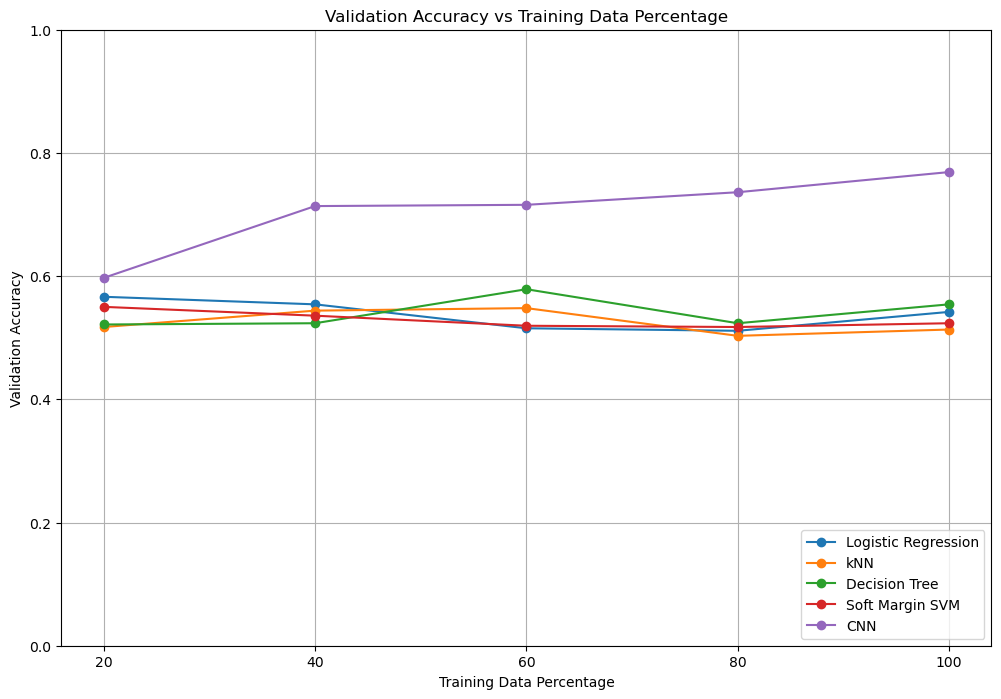

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load datasets
train_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

# Load validation dataset
valid_seq_df = pd.read_csv("datasets/valid/valid_text_seq.csv") 
valid_seq_X = valid_seq_df['input_str'].tolist() 
valid_seq_Y = valid_seq_df['label'].tolist() 

# Preprocessing: Convert input strings to sequences of integers
max_length = 50
train_seq_X = [[int(digit) for digit in seq] for seq in train_seq_X]
valid_seq_X = [[int(digit) for digit in seq] for seq in valid_seq_X]  # Preprocess validation data
train_seq_X = np.array(train_seq_X)
valid_seq_X = np.array(valid_seq_X)

# Convert labels to integers
label_encoder = LabelEncoder()
train_seq_Y = label_encoder.fit_transform(train_seq_Y)
valid_seq_Y = label_encoder.transform(valid_seq_Y)  # Transform validation labels using the same encoder
train_seq_Y = np.array(train_seq_Y)
valid_seq_Y = np.array(valid_seq_Y)

# Define CNN model architecture
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Embedding(input_dim=10, output_dim=32, input_length=input_shape[1]))
    model.add(Conv1D(24, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Change to softmax if multi-class
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train models and record validation accuracy
def train_model_on_subsets(model_func, model_type, X_train, y_train, X_val, y_val):
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    accuracies = []
    
    for p in percentages:
        subset_size = int(len(X_train) * p)
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        if model_type == "CNN":
            # Build and train the CNN model
            model = model_func(X_train_subset.shape)
            model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=64, verbose=0)
            y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
            val_accuracy = accuracy_score(y_val, y_val_pred)
        else:
            # Train traditional machine learning models
            model = model_func()
            model.fit(X_train_subset, y_train_subset)
            y_val_pred = model.predict(X_val)
            val_accuracy = accuracy_score(y_val, y_val_pred)

        accuracies.append(val_accuracy)
        print(f"{model_type} trained on {p * 100}% of the data: Validation Accuracy = {val_accuracy:.4f}")

    return percentages, accuracies

# Define models
models = {
    "Logistic Regression": lambda: LogisticRegression(max_iter=1000),
    "kNN": lambda: KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": lambda: DecisionTreeClassifier(),
    "Soft Margin SVM": lambda: SVC(kernel='linear', C=1),
    "CNN": build_cnn_model
}

# Store results for plotting
results = {}

# Train and evaluate each model
for model_name, model_func in models.items():
    print(f"Training {model_name}...")
    percentages, accuracies = train_model_on_subsets(model_func, model_name, train_seq_X, train_seq_Y, valid_seq_X, valid_seq_Y)
    results[model_name] = (percentages, accuracies)

# Plotting the results
plt.figure(figsize=(12, 8))
for model_name, (percentages, accuracies) in results.items():
    plt.plot([p * 100 for p in percentages], accuracies, marker='o', label=model_name)

plt.title("Validation Accuracy vs Training Data Percentage")
plt.xlabel("Training Data Percentage")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.xticks([20, 40, 60, 80, 100])
plt.ylim(0, 1)  # Set y-axis limits for clarity
plt.legend(loc="lower right")
plt.show()
